In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy

In [15]:
df = pd.read_csv("Data/amf_train_x.csv", index_col = 'Index')
df.head()

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
Index,,,,,,,,,,,,,,,,,,,,,
1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,419.688500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,0.003374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
3,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,0.000599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
4,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,6.152666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
5,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,0.001364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105782 entries, 1 to 105782
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Share                       105782 non-null  object 
 1   Day                         105782 non-null  object 
 2   Trader                      105782 non-null  object 
 3   OTR                         104099 non-null  float64
 4   OCR                         105782 non-null  float64
 5   OMR                         58170 non-null   float64
 6   min_time_two_events         105782 non-null  float64
 7   mean_time_two_events        105782 non-null  float64
 8   10_p_time_two_events        105782 non-null  float64
 9   med_time_two_events         105782 non-null  float64
 10  25_p_time_two_events        105782 non-null  float64
 11  75_p_time_two_events        105782 non-null  float64
 12  90_p_time_two_events        105782 non-null  float64
 13  max_time_two_e

In [17]:
y = pd.read_csv("Data/amf_train_y.csv")

In [13]:
y.unique()

Trader    86
type       3
dtype: int64

In [8]:
X_test = pd.read_csv("Data/amf_test_x.csv", index_col = 'Index')
X_test.head()

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
Index,,,,,,,,,,,,,,,,,,,,,
1,Isin_106,Date_12,Adelaide,1.114754,68.0,NaN,0.000012,22.905096,0.000061,0.003870,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
2,Isin_94,Date_2,Adelaide,1.666667,5.0,NaN,0.001970,67.630572,0.001970,0.005786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,Isin_106,Date_13,Adelaide,1.088235,37.0,NaN,0.000000,39.506490,0.000000,0.000485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,Isin_106,Date_7,Adelaide,2.250000,4.5,NaN,0.000000,103.378733,0.000000,0.004708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
5,Isin_106,Date_20,Adelaide,1.266667,19.0,NaN,0.000026,49.417177,0.000063,0.000152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [10]:
X_test['Trader'].value_counts()

Duchess                 8452
Evinrude                6240
Marahute                4748
Flash                   4090
Big Mama                2124
                        ... 
Bucky Oryx-Antlerson       1
Maui                       1
Braddock                   1
Fairy Mary                 1
Flunkey the Baboon         1
Name: Trader, Length: 85, dtype: int64

In [11]:
df['Trader'].value_counts()

Trader_209    10208
Trader_161     7587
Trader_386     5808
Trader_430     5044
Trader_431     2552
              ...  
Trader_191        4
Trader_375        4
Trader_149        4
Trader_257        2
Trader_425        1
Name: Trader, Length: 86, dtype: int64

In [19]:
y

,Trader,type
0,Trader_285,MIX
1,Trader_114,NON HFT
2,Trader_110,NON HFT
3,Trader_57,NON HFT
4,Trader_128,NON HFT
...,...,...
81,Trader_140,MIX
82,Trader_451,MIX
83,Trader_438,MIX
84,Trader_278,HFT


In [21]:
df = df.merge(y, on = 'Trader')

In [23]:
traders = df.groupby('Trader').mean().reset_index().merge(y, on = 'Trader')
traders

,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,...,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,type
0,Trader_10,2.133353,24.362271,55.003849,8.956736,2431.882764,9.332928,831.154295,31.667709,2974.318122,...,69.946217,69.946217,NaN,NaN,NaN,NaN,NaN,NaN,16.805195,NON HFT
1,Trader_105,5.399858,39.622702,1.371978,20.388370,4710.344772,20.451175,329.882101,40.584926,4946.006166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.258772,NON HFT
2,Trader_107,3.661004,7.270289,292.026396,0.597774,88.883777,0.687852,16.229210,2.731964,71.448717,...,434.224201,253.081572,215.063614,454.587308,273.021629,203.060652,457.921816,255.990849,75.371460,MIX
3,Trader_110,3.508333,8.750000,NaN,1510.086341,14886.664609,1510.086341,2909.984216,1510.086341,26757.402475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.625000,NON HFT
4,Trader_114,4.987915,26.304692,219.000000,251.787335,7331.947733,255.691851,1935.314730,463.869943,10727.553461,...,799.668493,491.815132,249.271273,799.668493,491.815132,249.271273,799.668493,491.815132,105.414524,NON HFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Trader_51,3.984287,14.601212,14.992171,76.184926,4396.805226,79.343803,620.547924,117.392622,6369.119719,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.265734,NON HFT
82,Trader_54,2.895337,14.721527,11.902422,3.755166,1548.125468,3.854575,81.862178,9.818471,1820.165243,...,2068.029621,909.511111,848.133333,2068.029621,909.511111,848.133333,2068.029621,909.511111,10.982759,NON HFT
83,Trader_57,2.962073,13.685897,17.812500,223.182288,4708.397280,224.589672,639.686837,227.695426,7438.155272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.961538,NON HFT
84,Trader_59,3.208786,25.233333,25.000000,1189.167010,3839.773176,1189.167034,2549.459772,1195.509580,5873.570391,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NON HFT


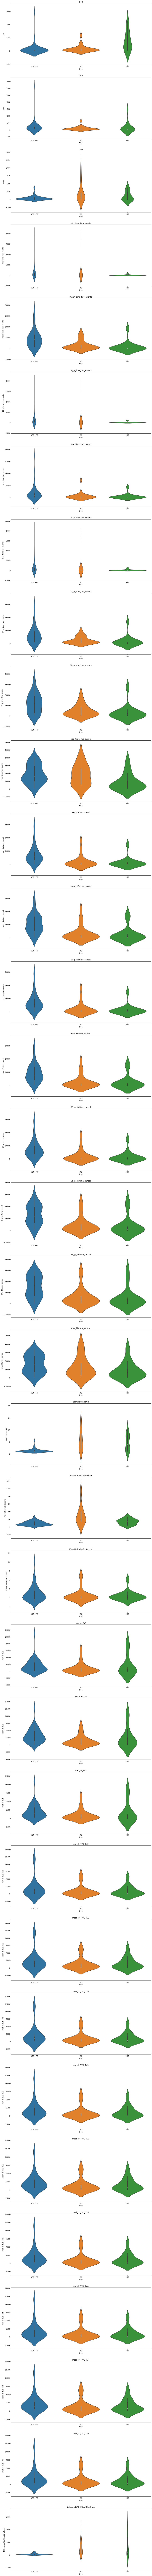

In [26]:
n_col = len(traders.columns) - 2

fig, axs = plt.subplots(nrows = n_col)

for variable, ax in zip(traders.drop(['Trader', 'type'], axis = 1).columns, axs):
    sns.violinplot(x = 'type', y = variable, data = traders, ax = ax)
    ax.set_title(variable)
    
    
fig.set_size_inches(16, 300)

In [18]:
df

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
Index,,,,,,,,,,,,,,,,,,,,,
1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,419.688500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,0.003374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
3,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,0.000599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
4,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,6.152666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
5,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,0.001364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105778,Isin_84,Date_27,Trader_60,1.150000,23.000000,NaN,0.0,736.500080,0.000000,0.000188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
105779,Isin_102,Date_18,Trader_60,1.352941,23.000000,NaN,0.0,63.672695,0.000000,0.000963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
105780,Isin_12,Date_13,Trader_60,1.146667,86.000000,NaN,0.0,708.440816,0.000000,0.000578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


In [27]:
df.describe()

,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
count,104099.000000,105782.000000,58170.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,...,80606.000000,80606.000000,80606.000000,80527.000000,80527.000000,80527.000000,80634.000000,80634.000000,80634.000000,105782.000000
mean,34.435038,17.458787,164.469153,87.472164,2772.513578,103.310102,1011.630575,228.659560,4734.942457,9786.032539,...,297.616104,598.637740,389.411017,310.498829,605.733603,401.594794,309.912605,615.154194,402.749527,334.034070
std,137.261154,71.843225,929.010848,1549.972501,4985.149536,1617.051421,4967.426924,2319.866837,10431.964706,14256.357615,...,1882.353978,2010.296401,1896.835552,1922.648030,2031.797111,1933.073024,1910.028651,2037.041672,1923.023720,644.816702
min,1.044444,2.000000,1.001960,0.000000,0.000065,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000001,0.000002,0.000001,0.000001,0.000003,0.000002,0.000001,0.000008,0.000003,1.000000
25%,3.709023,2.753802,3.253655,0.000000,69.365666,0.000000,1.243868,0.000024,22.249021,117.771340,...,0.000005,33.819189,2.533583,0.000006,32.699571,2.305276,0.000020,33.713187,2.639113,24.000000
50%,7.346154,4.789474,14.000000,0.000000,262.325253,0.000109,10.154920,0.093957,114.957445,480.715195,...,0.000232,110.427370,22.413161,0.000260,111.633327,23.665962,0.000270,113.158721,23.435835,97.000000
75%,22.707956,16.366667,73.689116,0.000000,3801.273320,0.020739,60.552090,2.836749,2277.450350,20975.263250,...,0.008000,367.974973,121.244211,0.051880,376.874393,127.408500,0.059669,380.865913,128.108940,342.000000
max,17561.000000,14409.000000,127861.000000,52568.766000,52568.765625,52568.766000,52568.766000,52568.766000,60597.414000,60609.660000,...,30904.835000,30904.835000,30904.835000,30904.835000,30904.835000,30904.835000,30904.835000,30904.835000,30904.835000,12966.000000


In [29]:
class NA_Counter(TransformerMixin)

array(['Date_24', 'Date_29', 'Date_23', 'Date_11', 'Date_9', 'Date_26',
       'Date_5', 'Date_7', 'Date_30', 'Date_10', 'Date_8', 'Date_27',
       'Date_15', 'Date_2', 'Date_13', 'Date_6', 'Date_28', 'Date_20',
       'Date_25', 'Date_19', 'Date_12', 'Date_18'], dtype=object)

In [28]:
df.nunique()

Share                           119
Day                              22
Trader                           86
OTR                           53084
OCR                           50829
OMR                           32112
min_time_two_events            4213
mean_time_two_events          86074
10_p_time_two_events          25124
med_time_two_events           77018
25_p_time_two_events          53605
75_p_time_two_events          84420
90_p_time_two_events          84176
max_time_two_events           76994
min_lifetime_cancel           52225
mean_lifetime_cancel          85605
10_p_lifetime_cancel          74858
med_lifetime_cancel           85258
25_p_lifetime_cancel          84054
75_p_lifetime_cancel          85132
90_p_lifetime_cancel          84984
max_lifetime_cancel           84235
NbTradeVenueMic                  24
MaxNbTradesBySecond             342
MeanNbTradesBySecond          33789
min_dt_TV1                    16633
mean_dt_TV1                   81784
med_dt_TV1                  

* Les traders ont un nombre de NaNs différents:
    -> je vais surement devoir encoder cette information pour mon modèle
 
* Certains traders sont des outliers:
    -> je vais utiliser une technique de scaling robuste aux outliers -> QuantileTransformer
    
* On a pas la même quantité de données pour chaque trader alors que on doit faire la classification pour chaque trader:
    -> Je suis contraint à contraint à faire des predictions individuelles pour chaque ligne puis aggréger les prédictions.
    -> le train_test_split devra se faire par trader.
    
    